# Facial Key Point Detection

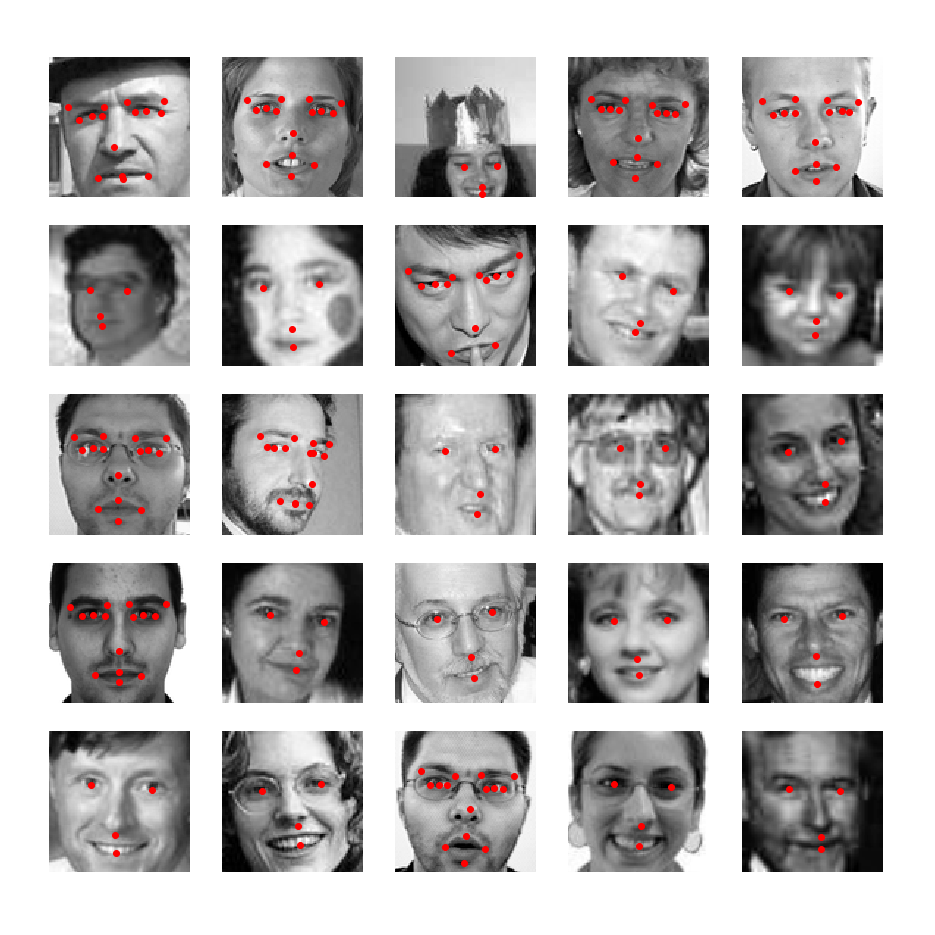

## Import Libraries

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import PIL
from PIL import *

## Load the Data

In [2]:
keyfacial_df = pd.read_csv('../Data/data.csv')

In [3]:
keyfacial_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [4]:
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
keyfacial_df.shape

(2140, 31)

In [6]:
#Check for missing values
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [7]:
keyfacial_df['Image'].shape

(2140,)

In [8]:
# Check the type of image
type(keyfacial_df['Image'][0])

str

In [9]:
image = keyfacial_df['Image'][0].split()
image

['238',
 '236',
 '237',
 '238',
 '240',
 '240',
 '239',
 '241',
 '241',
 '243',
 '240',
 '239',
 '231',
 '212',
 '190',
 '173',
 '148',
 '122',
 '104',
 '92',
 '79',
 '73',
 '74',
 '73',
 '73',
 '74',
 '81',
 '74',
 '60',
 '64',
 '75',
 '86',
 '93',
 '102',
 '100',
 '105',
 '109',
 '114',
 '121',
 '127',
 '132',
 '134',
 '137',
 '137',
 '140',
 '139',
 '138',
 '137',
 '137',
 '140',
 '141',
 '143',
 '144',
 '147',
 '148',
 '149',
 '147',
 '147',
 '148',
 '145',
 '147',
 '144',
 '146',
 '147',
 '147',
 '143',
 '134',
 '130',
 '130',
 '128',
 '116',
 '104',
 '98',
 '90',
 '82',
 '78',
 '85',
 '88',
 '86',
 '80',
 '77',
 '87',
 '108',
 '111',
 '115',
 '128',
 '133',
 '188',
 '242',
 '252',
 '250',
 '248',
 '251',
 '250',
 '250',
 '250',
 '235',
 '238',
 '236',
 '238',
 '238',
 '237',
 '238',
 '242',
 '241',
 '239',
 '237',
 '233',
 '215',
 '195',
 '187',
 '156',
 '119',
 '103',
 '93',
 '78',
 '68',
 '73',
 '75',
 '75',
 '72',
 '75',
 '70',
 '61',
 '66',
 '77',
 '91',
 '96',
 '106',
 '108'

In [10]:
len(image)

9216

In [11]:
# convert images to numpy arrays
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype='int', sep= ' ').reshape(96, 96))

In [12]:
keyfacial_df['Image'][0].shape

(96, 96)

Now each image is 96x96

## Visualize Images

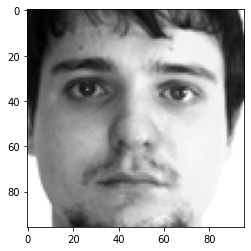

In [13]:
# Plot image
# select a random number
index = np.random.randint(1, len(keyfacial_df['Image']))
plt.imshow(keyfacial_df['Image'][index], cmap="gray")

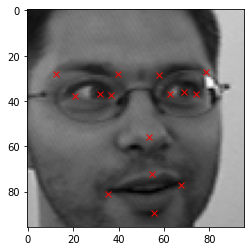

In [14]:
# Plot image with facial point
# select a random number
index = np.random.randint(1, len(keyfacial_df['Image']))
plt.imshow(keyfacial_df['Image'][index], cmap="gray")
for i in range(1, 31, 2):
    plt.plot(keyfacial_df.loc[index][i-1], keyfacial_df.loc[index][i], 'rx')

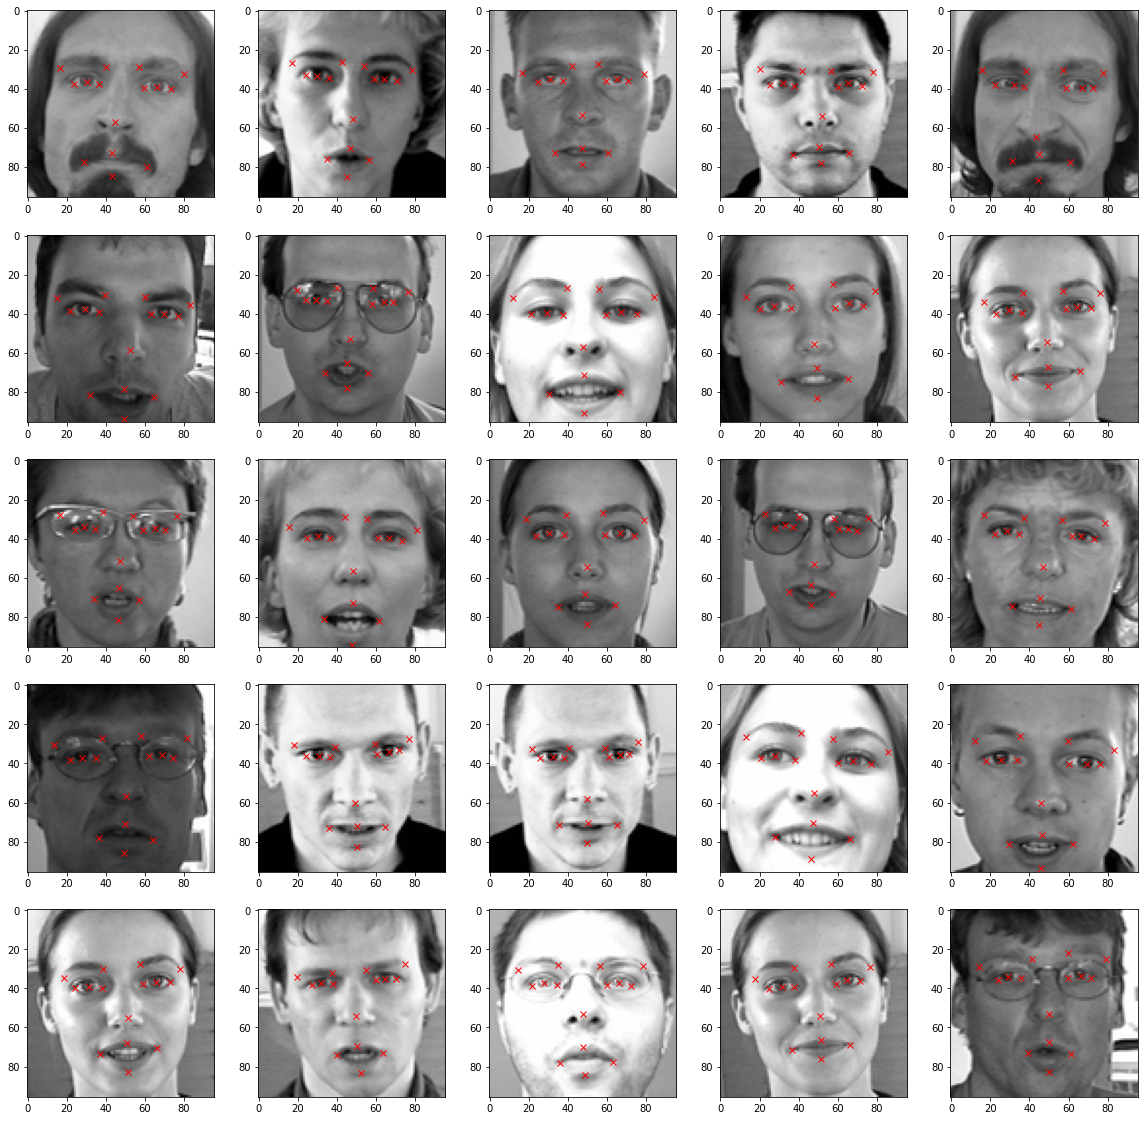

In [15]:
# Plot a grid of images
fig = plt.figure(figsize=(20,20))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    image = plt.imshow(keyfacial_df['Image'][i], cmap='gray')
    for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

## Perfom Image Augmentation

In [16]:
# copy the data first
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [17]:
# Obtain the columns name 
columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [18]:
# Perform Horizontal Flip
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis=1))

# Now flip the x-axis points
for i in range(len(columns)):
    # take only the x's points
    if i % 2 == 0:
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

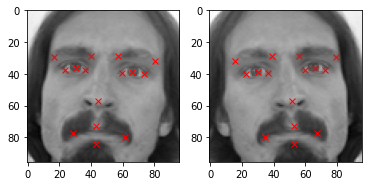

In [19]:
fig = plt.figure()
# Plot original image
index = 0
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(keyfacial_df['Image'][index], cmap="gray")
for i in range(1, 31, 2):
    ax1.plot(keyfacial_df.loc[index][i-1], keyfacial_df.loc[index][i], 'rx')

# Plot fliped image
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(keyfacial_df_copy['Image'][index], cmap="gray")
for i in range(1, 31, 2):
    ax2.plot(keyfacial_df_copy.loc[index][i-1], keyfacial_df_copy.loc[index][i], 'rx')

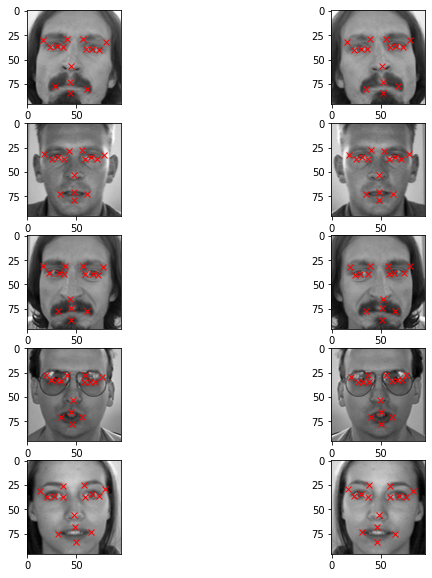

In [20]:
fig = plt.figure(figsize=(10,10))
for index in range(10):
    ax = fig.add_subplot(5, 2, index+1)
    if index%2==0:
        image = plt.imshow(keyfacial_df['Image'][index], cmap='gray')
        for j in range(1, 31, 2):
            plt.plot(keyfacial_df.loc[index][j-1], keyfacial_df.loc[index][j], 'rx')
    else:
        image = plt.imshow(keyfacial_df_copy['Image'][index-1], cmap='gray')
        for j in range(1, 31, 2):
            plt.plot(keyfacial_df_copy.loc[index-1][j-1], keyfacial_df_copy.loc[index-1][j], 'rx')

In [21]:
# Concatenate the original images with the augmented images
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))
augmented_df.shape

(4280, 31)

In [22]:
# Increase the brightness of images
# copy the dataframe first
# pic a random number between 1.5 and 2 and multiply each pixel with this number
# finally clip the result to make sure that the pixels are between 0 and 255
import random
keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.clip(random.uniform(1.5, 2)*x, 0.0, 255.0))

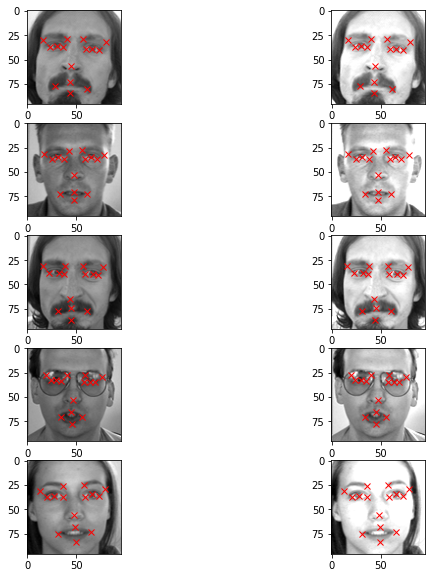

In [23]:
fig = plt.figure(figsize=(10,10))
for index in range(10):
    ax = fig.add_subplot(5, 2, index+1)
    if index%2==0:
        image = plt.imshow(keyfacial_df['Image'][index], cmap='gray')
        for j in range(1, 31, 2):
            plt.plot(keyfacial_df.loc[index][j-1], keyfacial_df.loc[index][j], 'rx')
    else:
        image = plt.imshow(keyfacial_df_copy['Image'][index-1], cmap='gray')
        for j in range(1, 31, 2):
            plt.plot(keyfacial_df_copy.loc[index-1][j-1], keyfacial_df_copy.loc[index-1][j], 'rx')

In [24]:
# Concatenate the original images with the augmented images
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

In [25]:
# Perform Vertical Flip
keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis=0))
# Now flip the y-axis points
for i in range(len(columns)):
    # take only the y's points
    if i % 2 != 0:
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

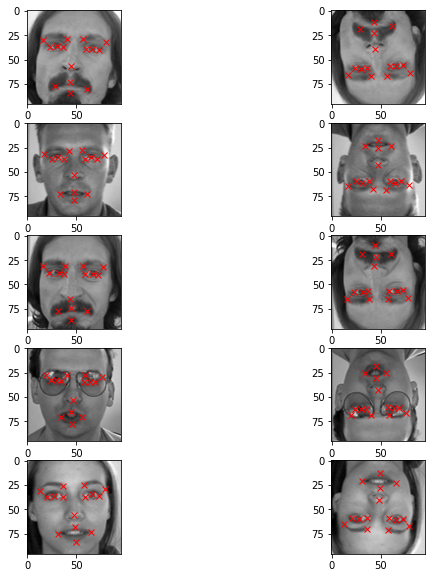

In [26]:
fig = plt.figure(figsize=(10,10))
for index in range(10):
    ax = fig.add_subplot(5, 2, index+1)
    if index%2==0:
        image = plt.imshow(keyfacial_df['Image'][index], cmap='gray')
        for j in range(1, 31, 2):
            plt.plot(keyfacial_df.loc[index][j-1], keyfacial_df.loc[index][j], 'rx')
    else:
        image = plt.imshow(keyfacial_df_copy['Image'][index-1], cmap='gray')
        for j in range(1, 31, 2):
            plt.plot(keyfacial_df_copy.loc[index-1][j-1], keyfacial_df_copy.loc[index-1][j], 'rx')

In [27]:
# Concatenate the original images with the augmented images
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(8560, 31)

## Data Normalization and Scaling 

In [28]:
# take the images
img = augmented_df[:, 30]
img.shape

(8560,)

In [29]:
img[0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [30]:
img = img/255.
img[0]

array([[0.93333333, 0.9254902 , 0.92941176, ..., 0.98039216, 0.98039216,
        0.98039216],
       [0.92156863, 0.93333333, 0.9254902 , ..., 0.97647059, 0.98039216,
        0.98431373],
       [0.92941176, 0.9254902 , 0.92941176, ..., 0.98431373, 0.98431373,
        0.98039216],
       ...,
       [0.72941176, 0.71764706, 0.70980392, ..., 0.20392157, 0.22352941,
        0.23529412],
       [0.74117647, 0.7372549 , 0.81176471, ..., 0.23921569, 0.27058824,
        0.30588235],
       [0.74901961, 0.72156863, 0.72156863, ..., 0.2745098 , 0.29411765,
        0.35294118]])

In [31]:
# Create empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis=2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [32]:
# Optain the outputs
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

## Split the data 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6848, 96, 96, 1)
(6848, 30)
(1712, 96, 96, 1)
(1712, 30)


## Build Deep Residual Neural Network ResNet Architecture

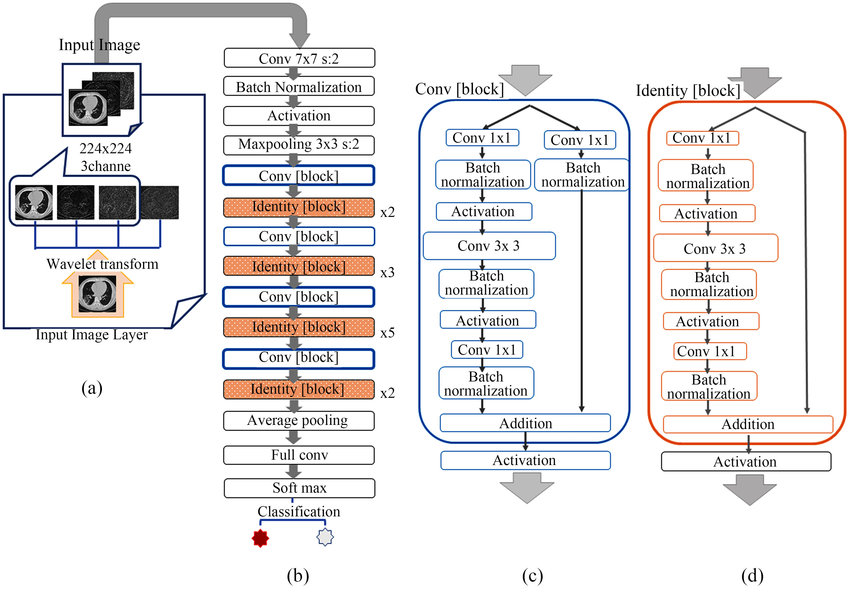

Image from: https://www.researchgate.net/figure/Outline-of-ResNet-50-architecture-a-A-3-channel-image-input-layer-The-LL-LH-and-HH_fig3_343233188

In [35]:
from tensorflow.keras.initializers import glorot_uniform
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import *

def res_block(X, filters, stage):
    # Convolutional_block
    X_copy = X

    f1 , f2, f3 = filters

    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 
   
    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


    # Short path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 2
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X

In [36]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filters= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filters= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

## Train the model 

In [37]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

In [38]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "../models/FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [39]:
history = model_1_facialKeyPoints.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 100,
    validation_split = 0.1,
    callbacks=[checkpointer])

Epoch 1/100
97/97 [==============================] - 46s 349ms/step - loss: 222.3552 - accuracy: 0.5251 - val_loss: 1234.9717 - val_accuracy: 0.5066

Epoch 00001: val_loss improved from inf to 1234.97168, saving model to ../models\FacialKeyPoints_weights.hdf5


C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
97/97 [==============================] - 30s 312ms/step - loss: 80.4795 - accuracy: 0.7157 - val_loss: 503.1491 - val_accuracy: 0.5723

Epoch 00002: val_loss improved from 1234.97168 to 503.14914, saving model to ../models\FacialKeyPoints_weights.hdf5
Epoch 3/100
97/97 [==============================] - 31s 314ms/step - loss: 58.4551 - accuracy: 0.7104 - val_loss: 220.9870 - val_accuracy: 0.7518

Epoch 00003: val_loss improved from 503.14914 to 220.98700, saving model to ../models\FacialKeyPoints_weights.hdf5
Epoch 4/100
97/97 [==============================] - 30s 311ms/step - loss: 47.7615 - accuracy: 0.7063 - val_loss: 86.8953 - val_accuracy: 0.7474

Epoch 00004: val_loss improved from 220.98700 to 86.89532, saving model to ../models\FacialKeyPoints_weights.hdf5
Epoch 5/100
97/97 [==============================] - 31s 314ms/step - loss: 42.4797 - accuracy: 0.7165 - val_loss: 59.1859 - val_accuracy: 0.7620

Epoch 00005: val_loss improved from 86.89532 to 59.18592, saving 

97/97 [==============================] - 30s 305ms/step - loss: 5.3283 - accuracy: 0.8493 - val_loss: 38.9727 - val_accuracy: 0.8219

Epoch 00080: val_loss did not improve from 38.52377
Epoch 81/100
97/97 [==============================] - 30s 307ms/step - loss: 5.0308 - accuracy: 0.8460 - val_loss: 40.0577 - val_accuracy: 0.8263

Epoch 00081: val_loss did not improve from 38.52377
Epoch 82/100
97/97 [==============================] - 30s 305ms/step - loss: 5.7000 - accuracy: 0.8376 - val_loss: 40.6845 - val_accuracy: 0.8219

Epoch 00082: val_loss did not improve from 38.52377
Epoch 83/100
97/97 [==============================] - 30s 307ms/step - loss: 5.6135 - accuracy: 0.8413 - val_loss: 38.9378 - val_accuracy: 0.8190

Epoch 00083: val_loss did not improve from 38.52377
Epoch 84/100
97/97 [==============================] - 30s 305ms/step - loss: 5.4159 - accuracy: 0.8494 - val_loss: 37.6762 - val_accuracy: 0.8219

Epoch 00084: val_loss improved from 38.52377 to 37.67619, saving model

In [52]:
# Save the model to json file 
import os
path = './models/'
model_name = 'FacialKeyPoints-model.json'
path = os.path.join(path, model_name)
model_js = model_1_facialKeyPoints.to_json()
with open(path, 'w') as json_file:
    json_file.write(model_js)

## Check Model Performance 

In [53]:
# Evaluate the model
result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

54/54 [==============================] - 4s 68ms/step - loss: 37.1122 - accuracy: 0.7839
Accuracy : 0.78387850522995


In [54]:
# Get the model keys 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

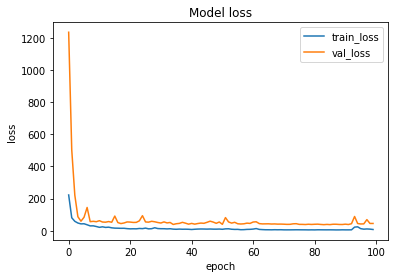

In [55]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [56]:
facialKeyPoint_prediction = model_1_facialKeyPoints.predict(X_test)

In [57]:
facialKeyPoint_prediction.shape

(1712, 30)

In [58]:
facialKeyPoint_prediction[0]

array([65.72247 , 36.954338, 33.176586, 36.440296, 57.979534, 37.84642 ,
       73.16687 , 38.168   , 39.18221 , 37.545418, 25.891562, 37.310635,
       54.08386 , 28.480726, 79.08837 , 30.173946, 40.180202, 29.207083,
       21.655666, 28.71437 , 40.92385 , 55.322697, 61.061848, 73.22221 ,
       32.531265, 71.86703 , 44.178814, 71.2045  , 44.429775, 74.919304],
      dtype=float32)

In [59]:
y_test.shape

(1712, 30)

In [61]:
# Plot image with facial point
# select a random number
plt.imshow(X_test[0], cmap='gray')
for i in range(1, 31, 2):
    plt.plot(facialKeyPoint_prediction[index][i-1], facialKeyPoint_prediction[index][i], 'rx')
     plt.plot(y_test[i][j-1], y_test[i][j], 'bx')

IndentationError: unexpected indent (645446905.py, line 6)

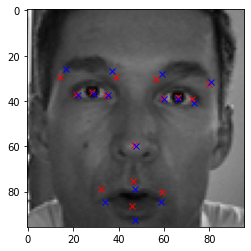

In [93]:
i = np.random.randint(1, len(X_test))
plt.imshow(X_test[i], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialKeyPoint_prediction[i][j-1], facialKeyPoint_prediction[i][j], 'rx')
        plt.plot(y_test[i][j-1], y_test[i][j], 'bx')

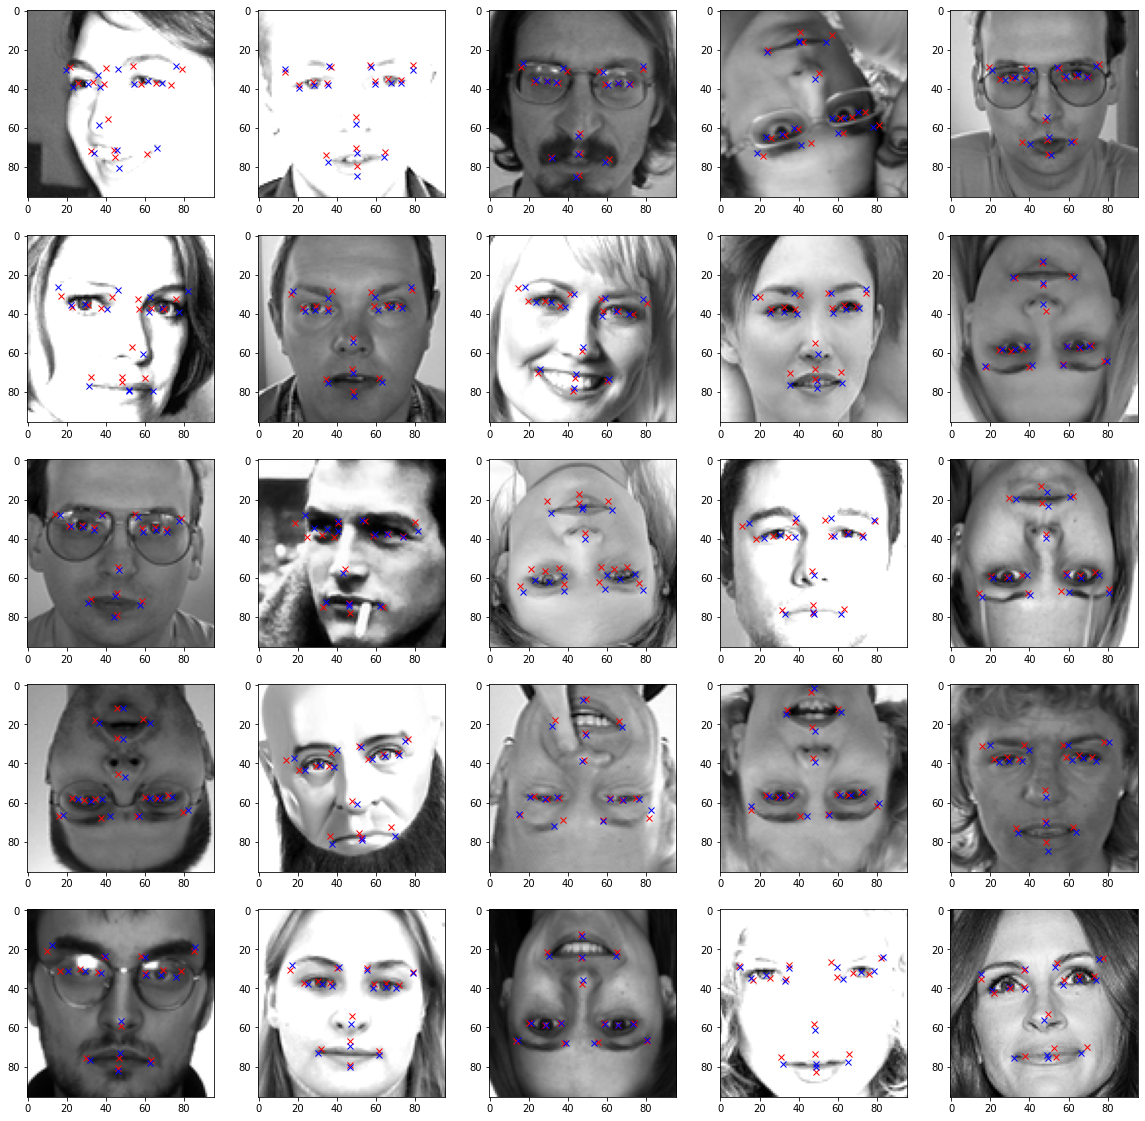

In [48]:
# Plot a grid of images
fig = plt.figure(figsize=(20,20))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    image = plt.imshow(X_test[i], cmap='gray')
    for j in range(1, 31, 2):
        plt.plot(facialKeyPoint_prediction[i][j-1], facialKeyPoint_prediction[i][j], 'rx')
        plt.plot(y_test[i][j-1], y_test[i][j], 'bx')